## Proyecto 1 

Nicolas Arango - 202220342
Mateo Rincon - 202221402
Amalia Carbonell - 202122079 



1. Entendimiento y preparación de los datos (a nivel de código y análisis).
2. Modelado y evaluación.

### Entendimiento y preparación de los datos (a nivel de código y análisis)

In [ ]:
import os
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
import nltk
import nltk.tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer


import scipy.stats as stats

Importamos las bibliotecas para el procesamiento de lenguaje natural

In [2]:
nltk.data.path.append('./nltk_data')
from nltk.tokenize import sent_tokenize
# nltk.download('punkt', download_dir='/Users/nicolasarango/Library/Mobile Documents/com~apple~CloudDocs/Sexto Semestre/BI/Proyectos/Proyecto1/nltk_data')
# nltk.download('punkt_tab', download_dir='/Users/nicolasarango/Library/Mobile Documents/com~apple~CloudDocs/Sexto Semestre/BI/Proyectos/Proyecto1/nltk_data')
# nltk.download('stopwords', download_dir='/Users/nicolasarango/Library/Mobile Documents/com~apple~CloudDocs/Sexto Semestre/BI/Proyectos/Proyecto1/nltk_data')
# nltk.download('wordnet', download_dir='/Users/nicolasarango/Library/Mobile Documents/com~apple~CloudDocs/Sexto Semestre/BI/Proyectos/Proyecto1/nltk_data')

In [3]:
stopwords_spanish = stopwords.words('spanish')
lemmatizer = WordNetLemmatizer()

In [4]:
# Carga de Datos
#noticias_df = pd.read_csv("./data/fake_news_test.csv", sep=";", usecols=['ID','Titulo', "Descripcion", "Fecha"])
datax=pd.read_csv('./data/fake_news_spanish.csv', sep=';', encoding = 'utf-8')

In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
data = datax.copy()
# Eliminación de registros duplicados.
data=data.drop_duplicates()

data.shape


(56618, 5)

In [6]:
data.dtypes

ID             object
Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object

In [7]:
# Contar los tipos de datos en la columna "Titulo"
tipo_datos = data['Titulo'].apply(type).value_counts()
print(tipo_datos)

print(data['Titulo'][data['Titulo'].apply(type) == float])


Titulo
<class 'str'>      56602
<class 'float'>       16
Name: count, dtype: int64
3243     NaN
4189     NaN
5041     NaN
5644     NaN
7345     NaN
7652     NaN
9700     NaN
15159    NaN
19415    NaN
24806    NaN
35816    NaN
36724    NaN
40295    NaN
41810    NaN
47967    NaN
55146    NaN
Name: Titulo, dtype: object


In [8]:
### Uso ChatGPT
# cambiar float a String
data['Titulo'] = data['Titulo'].apply(lambda x: str(x) if isinstance(x, float) else x)
# cambiar float a String vacio ("")
data['Titulo'] = data['Titulo'].apply(lambda x: "" if x == "nan" else x)
tipo_datos = data['Titulo'].apply(type).value_counts()
print(tipo_datos)


Titulo
<class 'str'>    56618
Name: count, dtype: int64


In [9]:
# Contar los tipos de datos en la columna "Descripcion"
tipo_datos = data['Descripcion'].apply(type).value_counts()
print(tipo_datos)

Descripcion
<class 'str'>    56618
Name: count, dtype: int64


In [10]:
data.head()

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018


### Describir los Datos

Se hace una descripción más detallada de nuestros datos.Es un paso es muy importante para poder determinar problemas de calidad de datos. Además, nos dará información que será útil en la fase de preparación de datos.

In [11]:
data.describe()

,Label
count,56618.000000
mean,0.578226
std,0.493847
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56618 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           56618 non-null  object
 1   Label        56618 non-null  int64 
 2   Titulo       56618 non-null  object
 3   Descripcion  56618 non-null  object
 4   Fecha        56618 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.6+ MB


In [13]:
# Se calcula el porcentaje de los valores nulos por columna
print((data.isnull().sum()*100 / data.shape[0]).sort_values(ascending=False))

ID             0.0
Label          0.0
Titulo         0.0
Descripcion    0.0
Fecha          0.0
dtype: float64


In [14]:
# Analizar la duplicidad de los datos
data.duplicated().sum()

np.int64(0)

<Axes: xlabel='Label'>

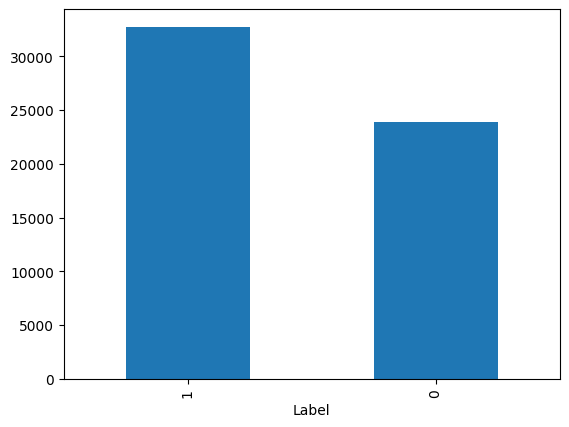

In [15]:
# Analizar distribución de noticias falsas
data['Label'].value_counts().plot(kind='bar')

## Lenguaje natural

In [16]:
from nltk.stem import PorterStemmer
import re
stemmer = SnowballStemmer('spanish')

In [ ]:
### Uso ChatGPT
def preprocessor(text):
    text = re.sub(r'<[^>]*>', '', text)  # Eliminar etiquetas HTML
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuaciones
    text = text.lower().strip()  # Convertir a minúsculas y eliminar espacios extra
    return text


In [18]:
data['Titulo'] = data['Titulo'].apply(preprocessor)
data['Descripcion'] = data['Descripcion'].apply(preprocessor)

In [19]:
# wpt = nltk.WordPunctTokenizer()
# ps = PorterStemmer()
# nltk.download('stopwords')
# stop_words = nltk.corpus.stopwords.words('spanish')

# def normalize_documents(doc):
#   doc = re.sub(r'[^a-zA-Z\s]','',doc, re.I|re.A)
#   doc = doc.lower()
#   doc = doc.strip()
#   tokens = wpt.tokenize(doc)
#   filtered_token = [ps.stem(token) for token in tokens if token not in stop_words]
#   doc = ' '.join(filtered_token)
#   return doc

In [20]:
# normalize_corpus = np.vectorize(normalize_documents)
# data['Titulo'] = data['Titulo'].apply(normalize_corpus)
# data['Descripcion'] = data['Descripcion'].apply(normalize_corpus)
data.head(20)

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,the guardian va con sánchez europa necesita qu...,el diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,revelan que el gobierno negocio la liberación ...,revelan que el gobierno negocio la liberación ...,01/10/2023
2,ID,1,el ahora o nunca de joan fuster sobre el estat...,el valencianismo convoca en castelló su fiesta...,25/04/2022
3,ID,1,iglesias alienta a yolanda díaz erc y eh bildu...,en política igual que hay que negociar con los...,03/01/2022
4,ID,0,puigdemont no sería ninguna tragedia una repet...,en una entrevista en el punt avui el líder de ...,09/03/2018
5,ID,1,el pnv consolida su mayoría el pse salva los p...,los nacionalistas consiguen las alcaldías de b...,26/05/2019
6,ID,0,el exconsejero núria marín pide el indulto en ...,sus familiares aluden a su honestidad e integr...,16/09/2022
7,ID,1,la fiscalía pide prisión incondicional para lo...,suprime el delito de rebelión que les imputó i...,26/09/2019
8,ID,1,josé manuel pérez tornero el creador de la tel...,el futuro presidente de rtve es licenciado en ...,25/02/2021
9,ID,0,la ayusización del bng santiago abascal instru...,pablo santiago abascal planea vivir de las ren...,10/05/2021


## N-Gramas

In [21]:
bv = CountVectorizer(ngram_range=(2,3), max_features=100000)#Usa 10,000 palabras mas comunes

bv_matrix = bv.fit_transform(data['Titulo'])
bv_matrix2 = bv.fit_transform(data['Descripcion'])
#bv_matrix = bv_matrix.toarray()
#bv_matrix2 = bv_matrix2.toarray()
vocab = bv.get_feature_names_out()
#pd.DataFrame(bv_matrix, columns=vocab)

Identificamos que el DataFrame solamente tiene el 28% con fake news por lo que utilizaremos un test size de 0.3 y stratify para equilibrar entre las noticias verdaderas y falsas (1 y 0).

In [22]:
#X_train, X_test, Y_train, Y_test = train_test_split(data['Titulo'], data['Label'], test_size=0.3, stratify=data['Label'], random_state=1)

data['Texto'] = data['Titulo'] + " " + data['Descripcion']
X_train, X_test, Y_train, Y_test = train_test_split(data['Texto'], data['Label'], test_size=0.3, stratify=data['Label'], random_state=1)

In [23]:
X_train.shape, X_test.shape

((39632,), (16986,))

In [24]:
pd.Series(Y_train).value_counts(normalize=True)

Label
1    0.57822
0    0.42178
Name: proportion, dtype: float64

<Axes: xlabel='Label'>

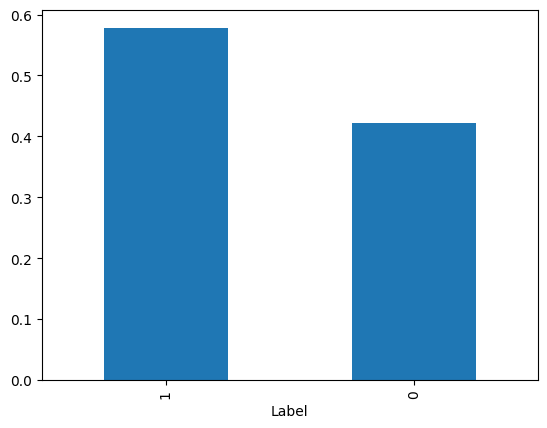

In [25]:
Y_train.value_counts(normalize=True).plot(kind='bar')

In [26]:
pd.Series(Y_test).value_counts(normalize=True)

Label
1    0.578241
0    0.421759
Name: proportion, dtype: float64

**Creamos el BoW:**
- Utilizando la biblioteca ntlk
- Tokenizamos las palabras
- Nos enfocamos en solo usar la biblioteca de español
- Identificamos los stop words

In [ ]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stopwords_spanish, lowercase=True, token_pattern=None)

In [28]:
bow

CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                token_pattern=None,
                tokenizer=<function word_tokenize at 0x1284d1580>)

In [29]:
X_bow_train = bow.fit_transform(X_train)

In [30]:
len(bow.vocabulary_)

47178

In [ ]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stopwords_spanish, lowercase=True)

In [32]:
X_tfidf = tfidf.fit_transform(X_train)

/Users/nicolasarango/.pyenv/versions/3.12.4/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [33]:
len(tfidf.vocabulary_)

47178

In [34]:
X_tfidf.shape

(39632, 47178)

# Algoritmos de clasificación

### Support Vector Machines (SVM)
Se utilizó un SVM para por su flexibilidad para clasificar ya que al manejar un data set extenso de lenguaje natural etiquetado con 1 y 0, es posible crear un BoW y TD-IDF, permite manejar el overfitting muy bien y al utilizar un kernel lineal podemos separar fácilmente entre fake news y noticias verdadesras.

![Texto alternativo](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

*Imagen tomada de: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html*

*Referencias: https://scikit-learn.org/stable/modules/svm.html*

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7164
           1       0.89      0.96      0.92      9822

    accuracy                           0.91     16986
   macro avg       0.91      0.90      0.90     16986
weighted avg       0.91      0.91      0.91     16986



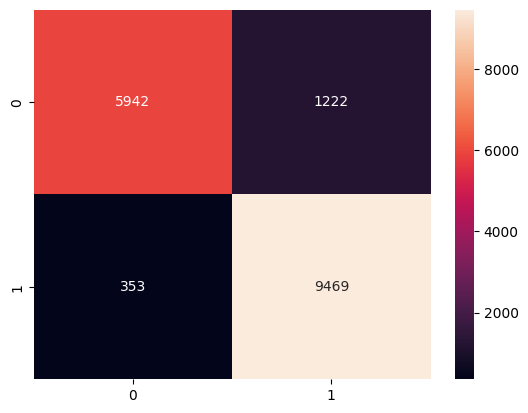

In [35]:
# crean un modelo de SVM para clasificar las noticias
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_tfidf, Y_train)

X_tfidf_test = tfidf.transform(X_test)
Y_pred = svm.predict(X_tfidf_test)
accuracy_score(Y_test, Y_pred)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d')

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

###Uso ChatGPT
#from sklearn.model_selection import GridSearchCV

#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
#grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
#grid.fit(X_tfidf, Y_train)

#grid.best_params_

#grid.best_estimator_

#grid_predictions = grid.predict(X_tfidf_test)
#accuracy_score(Y_test, grid_predictions)


### Entrenamos el modelo con el Bag of Words (BoW)

- Los valores positivos indican palabras asociadas con noticias verdaderas.
- Los valores negativos indican palabras asociadas con noticias falsas.

In [ ]:
### Uso ChatGPT
from sklearn.svm import LinearSVC

# Entrena un modelo SVM lineal
linear_svm = LinearSVC(C=1.0, random_state=1, dual=False)
linear_svm.fit(X_tfidf, Y_train)

# Obtener la importancia de palabras
coefficients = linear_svm.coef_.flatten()
feature_names = np.array(tfidf.get_feature_names_out())

word_importance = pd.DataFrame({'Palabra': feature_names, 'Importancia': coefficients})
word_importance = word_importance.reindex(word_importance.Importancia.abs().sort_values(ascending=False).index)

print(word_importance.head(20))

         Palabra  Importancia
19077       equo   -12.840344
17321     eajpnv   -11.138856
7789         bng   -10.974469
34846    podemos    10.200223
45895       vers    -8.231349
19090        erc     8.004956
43040    sánchez     7.732679
8688     canaria    -7.706493
31331    narbona    -7.579319
8539     calviño    -6.873507
35907     prieto    -6.525604
8691    canarias    -6.389590
22609   gallardo    -6.388974
33931        per    -6.286814
7866    boluarte    -6.256526
34805        pnc    -6.024917
11092  compromís     5.578727
26973         iu     5.256637
13582       cura    -5.252350
13884      david    -5.233566


In [38]:
from sklearn import svm
from sklearn.svm import SVC
bow_clf = svm.SVC(kernel='linear')
# Entrenar el modelo
bow_clf.fit(X_bow_train, Y_train)

SVC(kernel='linear')

**Generamos predicciones para el entrenamiento y testeo**

In [39]:
y_train_bow_pred = bow_clf.predict(X_bow_train)
y_test_bow_pred = bow_clf.predict(bow.transform(X_test))

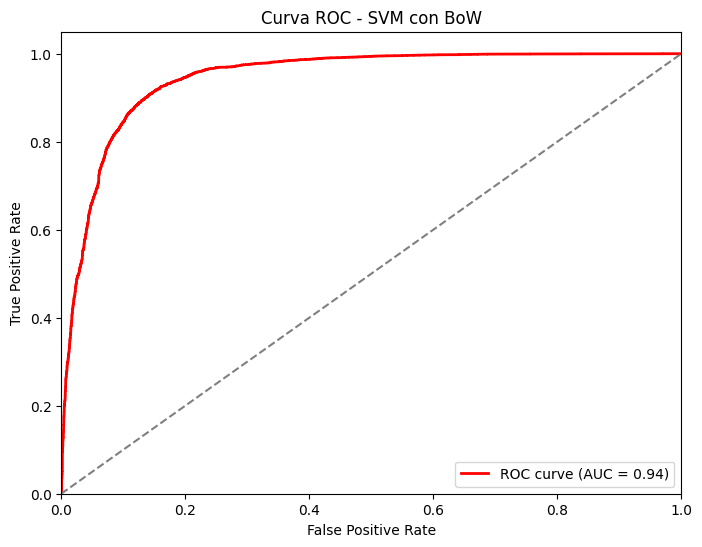

In [ ]:
###GPT
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción del modelo con BoW
y_scores_bow = bow_clf.decision_function(bow.transform(X_test))  # decision_function() para SVM lineal

# Calcular la curva ROC
fpr_bow, tpr_bow, _ = roc_curve(Y_test, y_scores_bow)
roc_auc_bow = auc(fpr_bow, tpr_bow)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_bow, tpr_bow, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc_bow:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - SVM con BoW')
plt.legend(loc='lower right')
plt.show()

**Matriz de confusión para el entrenamiento:**

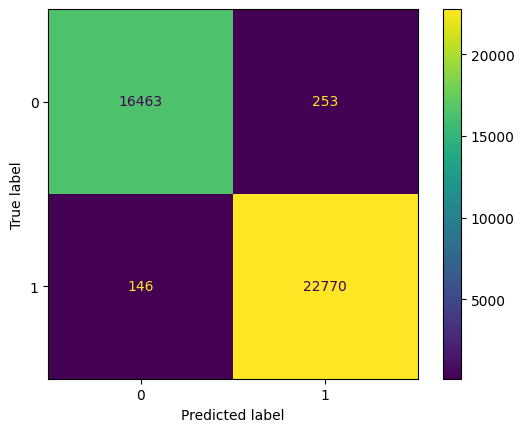

In [40]:
metrics.ConfusionMatrixDisplay.from_predictions(Y_train, y_train_bow_pred)

**Matriz de confusión para el testeo:**

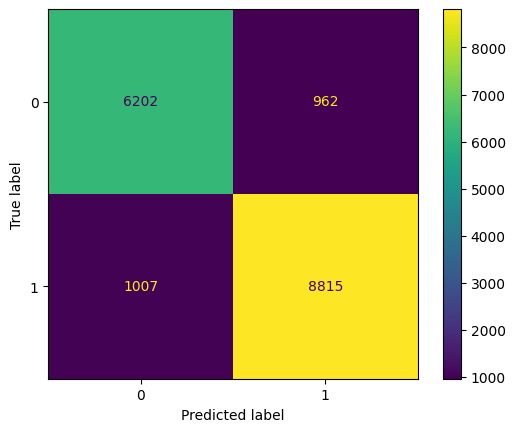

In [41]:
metrics.ConfusionMatrixDisplay.from_predictions(Y_test, y_test_bow_pred)

**Evaluamos el rendimiento del modelo de clasificación (TRAIN):**

In [42]:
print('Precision: ', metrics.precision_score(Y_train, y_train_bow_pred, pos_label=1))
print('Recall: ', metrics.recall_score(Y_train, y_train_bow_pred, pos_label=1))
print('F1: ', metrics.f1_score(Y_train, y_train_bow_pred, pos_label=1))

Precision:  0.989010989010989
Recall:  0.993628905568162
F1:  0.9913145693201855


**Evaluamos el rendimiento del modelo de clasificación (TEST):**

In [ ]:
print('Precision: ', metrics.precision_score(Y_test, y_test_bow_pred, pos_label=1))
print('Recall: ', metrics.recall_score(Y_test, y_test_bow_pred, pos_label=1))
print('F1: ', metrics.f1_score(Y_test, y_test_bow_pred, pos_label=1))

Precision:  0.9016058095530326
Recall:  0.897475055996742
F1:  0.899535690596459


### TF-IDF

**Medimos la importacia de las palabras**

In [43]:
tfidf_clf = svm.SVC(kernel='linear')
tfidf_clf.fit(X_tfidf, Y_train)

SVC(kernel='linear')

**Generamos predicciones para el entrenamiento y testeo**

In [44]:
y_train_tfidf_pred = tfidf_clf.predict(X_tfidf)
y_test_tfidf_pred = tfidf_clf.predict(tfidf.transform(X_test))

**Creamos una matriz de confusión para las predicciones (TRAIN)**

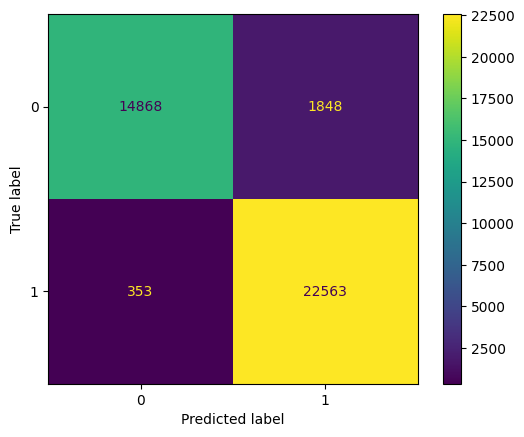

In [45]:
metrics.ConfusionMatrixDisplay.from_predictions(Y_train, y_train_tfidf_pred)

**Creamos una matriz de confusión para las predicciones (TEST)**

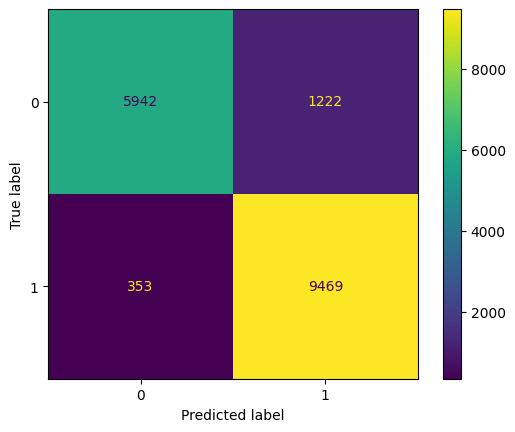

In [46]:
metrics.ConfusionMatrixDisplay.from_predictions(Y_test, y_test_tfidf_pred)

**Evaluamos el rendimiento del modelo de clasificación (TRAIN):**

In [ ]:
print('Precision:', metrics.precision_score(Y_train, y_train_tfidf_pred, pos_label = 1))
print('Recall:', metrics.recall_score(Y_train, y_train_tfidf_pred, pos_label = 1))
print('F1:', metrics.f1_score(Y_train, y_train_tfidf_pred, pos_label = 1))

Precision: 0.9242964237433944
Recall: 0.9845959155175423
F1: 0.9534937773364042


**Evaluamos el rendimiento del modelo de predicción (TEST):**

In [ ]:
print('Precision:', metrics.precision_score(Y_test, y_test_tfidf_pred, pos_label = 1))
print('Recall:', metrics.recall_score(Y_test, y_test_tfidf_pred, pos_label = 1))
print('F1:', metrics.f1_score(Y_test, y_test_tfidf_pred, pos_label = 1))

Precision: 0.8856982508652137
Recall: 0.9640602728568519
F1: 0.923219421830059


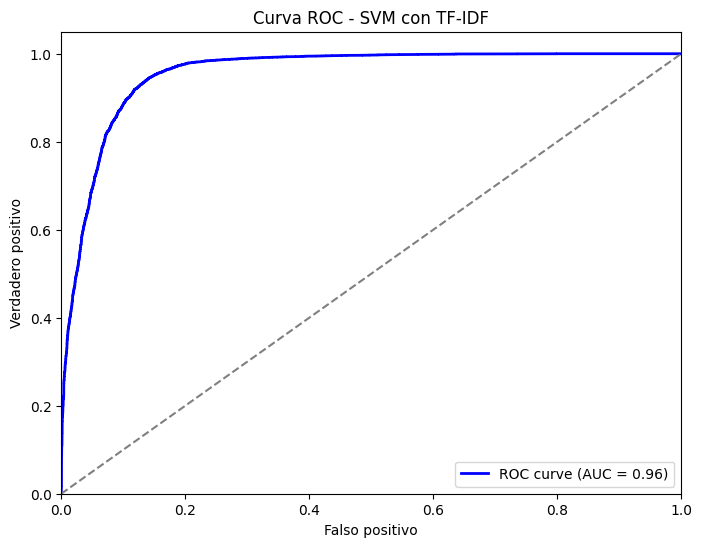

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción del modelo
y_scores = tfidf_clf.decision_function(X_tfidf_test)

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso positivo')
plt.ylabel('Verdadero positivo')
plt.title('Curva ROC - SVM con TF-IDF')
plt.legend(loc='lower right')
plt.show()

### Análisis de Error para el Algoritmo de SVM con BoW

In [ ]:
# Concateno los testeos
df_test = pd.concat([X_test, Y_test], axis=1).reset_index(drop=True)

# df de predicciones
df_pred = pd.DataFrame({'predicted': y_test_tfidf_pred})

# Concantenar el testeo con las predicciones
error_df = pd.concat([df_test, df_pred], axis=1)

error_df.rename(columns={'Label': 'actual'}, inplace=True)

print(error_df.head())

                                               Texto  actual  predicted
0  casado le cobra la factura a la ceoe por su po...       1          1
1  sánchez pide a torra no patrimonializar las in...       1          1
2  rita maestre y el aparato de moncloa volcados ...       0          0
3  la fiscalía rechaza aplazar la sentencia de ju...       1          1
4  el constitucional rechaza las recusaciones de ...       0          0


In [130]:
error_count = (error_df['actual'] != error_df['predicted']).sum()
print(f"Número de errores: {error_count}")

Número de errores: 1575


In [ ]:
error_df.loc[error_df['actual'] != error_df['predicted']].sample(10)

,Texto,actual,predicted
6632,la marcha de anne hidalgo al grupo mixto del c...,0,1
6118,pilar lima se va al senado la expresidenta de ...,0,1
14141,falciani arropado por pp pide al gobierno que ...,0,1
13100,las bases de eh bildu aprueban concurrir a las...,1,0
8927,ciudadanos toma posición como la organización ...,0,1
8975,pp y cs piden que montón aclare las dudas sobr...,0,1
7541,el gobierno anuncia que está a punto de aproba...,1,0
4821,el gobierno ha dado 630 millones de euros en s...,0,1
906,bescansa aterriza en galicia apuesta segura o ...,0,1
5561,citan como investigado a alberto fernández por...,0,1


# Análisis de Resultados

## Métricas de Desempeño

- **Precisión:** 89% (1) y 94% (0)  
- **Recall:** 96% (1) y 83% (0)  
- **Puntuación F1:** 92% (1) y 88% (0)  

### Interpretación de Métricas

#### **Precisión**  
El modelo identificó correctamente el 89% de las noticias clasificadas como verdaderas y el 94% de las clasificadas como falsas. Esto implica que el modelo es confiable al predecir noticias falsas, lo que reduce los falsos positivos y mejora la calidad de las predicciones.  

#### **Recall**  
El recall de 96% en noticias verdaderas significa que el modelo identificó correctamente el 96% de ellas, mientras que el 83% de las noticias falsas fueron correctamente detectadas. Un recall alto en la clase de noticias falsas es crucial, ya que minimiza el riesgo de que no se clasifiquen correctamente las fake news.

#### **F1 Score**  
El puntaje F1 de 88% en noticias falsas y 92% en noticias verdaderas indica que el modelo tiene un mejor desempeño en la detección de noticias verdaderas que en la identificación de noticias falsas.  


## **Matriz de Confusión**

| Actual / Predicción | Falso (0) | Verdadero (1) |
|---------------------|-----------|--------------|
| **Falso (0)** (TN) | 5942      | 1222          |
| **Verdadero (1)** (FN) | 353       | 9469         |

### **Análisis de la Matriz de Confusión**

- **Verdaderos Negativos (TN):** 5942 noticias falsas fueron correctamente clasificadas como falsas, lo que demuestra la efectividad del modelo en detectar fake news.  
- **Falsos Positivos (FP):** 1222 noticias falsas fueron clasificadas erróneamente como verdaderas. Aunque es no es un número muy alto, es lo suficiente para no confiar al 100% en este modelo
- **Falsos Negativos (FN):** 353 noticias verdaderas fueron clasificadas como falsas. Si bien el objetivo es identificar noticias falsas, es importante considerar que este tipo de error puede afectar la credibilidad de noticias legítimas.  
- **Verdaderos Positivos (TP):** 9469 noticias verdaderas fueron correctamente identificadas, reflejando un buen rendimiento en la detección de noticias reales.  


### Conclusiones
El uso de un SVM y el modelo entrenado con el BoW respectivo para los datos y encontrar las stop words, permite tener una alta prediccion y sensibilidad (recall) al momento de generar reconocer fake news para hacer predicciones sobre éstas. De igual manera existe un error del 2.78%. Este se puede reducir por medio de modificaciones en los N-gramas luego de analizar la cantidad promedio de palabras y caracteres que tienen las noticias



---

## Arboles de decision

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn import tree

Accuracy: 0.9164017426115625
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7164
           1       0.93      0.93      0.93      9822

    accuracy                           0.92     16986
   macro avg       0.91      0.91      0.91     16986
weighted avg       0.92      0.92      0.92     16986



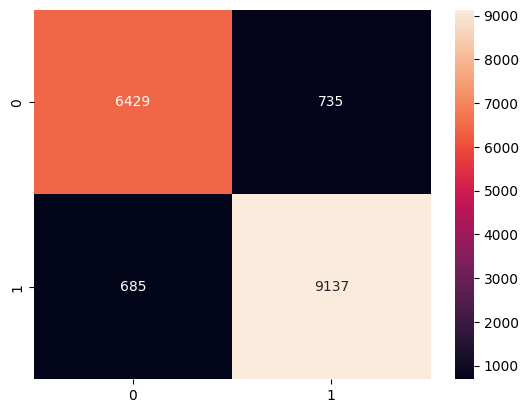

In [53]:
# Crear y entrenar el modelo de árbol de decisión
arbol = DecisionTreeClassifier(random_state=1)
arbol.fit(X_tfidf, Y_train)

# Transformar los datos de prueba
X_tfidf_test = tfidf.transform(X_test)

# Hacer predicciones
Y_pred = arbol.predict(X_tfidf_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d')

# Reporte de clasificación
print(classification_report(Y_test, Y_pred))

In [49]:
# Obtener las palabras del vectorizador TF-IDF
feature_names = tfidf.get_feature_names_out()

# Obtener la importancia de cada palabra en el árbol de decisión
importances = arbol.feature_importances_

# Crear un DataFrame para visualizar los resultados
word_importance = pd.DataFrame({'Palabra': feature_names, 'Importancia': importances})

# Ordenar de mayor a menor importancia
word_importance = word_importance.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 palabras más importantes
print(word_importance.head(10))

        Palabra  Importancia
33931       per     0.112910
19077      equo     0.080640
17321    eajpnv     0.069678
7789        bng     0.048935
31331   narbona     0.047637
8688    canaria     0.027700
40056      rita     0.022421
31247    mónica     0.017508
8691   canarias     0.016584
34846   podemos     0.016390


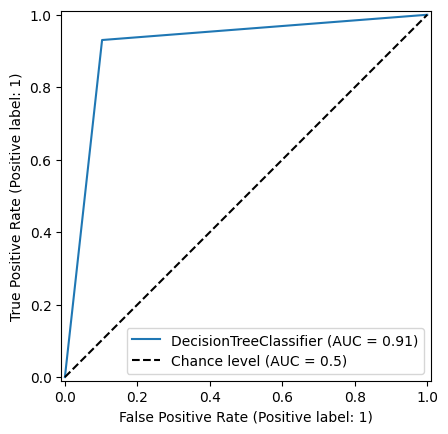

In [50]:
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_estimator(arbol, X_tfidf_test, Y_test, plot_chance_level=True)


In [51]:
# Fijemos el número de particiones. Utilizaremos K = 10.
from sklearn.model_selection import GridSearchCV, KFold


particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20]}

# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_tfidf, Y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20]})

In [137]:
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 20}

In [138]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_tfidf)
y_pred_test = arbol_final.predict(X_tfidf_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.88
Exactitud sobre test: 0.88


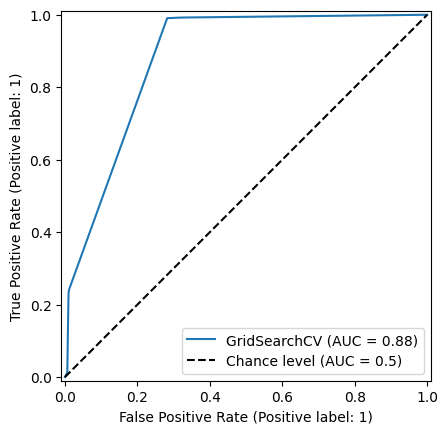

In [139]:
RocCurveDisplay.from_estimator(mejor_modelo, X_tfidf_test, Y_test, plot_chance_level=True)

<Axes: >

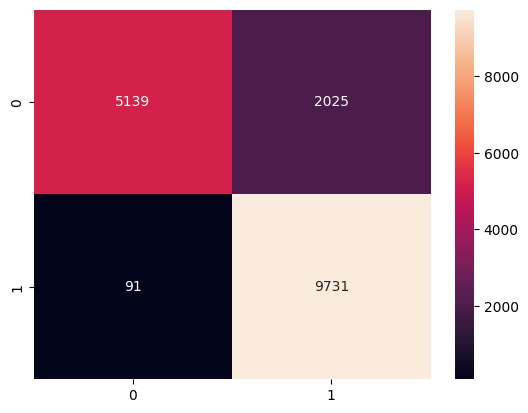

In [140]:
# Matriz de confusión
cm = confusion_matrix(Y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')

In [141]:
# Reporte de clasificación
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      7164
           1       0.83      0.99      0.90      9822

    accuracy                           0.88     16986
   macro avg       0.91      0.85      0.87     16986
weighted avg       0.89      0.88      0.87     16986



### Analisis de resultados 

- Exactitud: 91% 
- Recall: 93% (1) y 90% (0)
- Precision: 93% (1) y 90% (0)
- Puntuacion F1: 93% (1) y 90%(0)

**Exactitud:** Este valor nos indica que el 91% de las noticias fueron clasificadas correctamente. 

**Recall:** Este valor nos indica que el 93% de las noticias verdaderas fueron correctamente indentificadas mientras que el 90% de las noticias falsas fueron identificadas correctamente. Un recall alto en noticias falsas minimiza el riesgo de que noticias engañosas pasen desapercibidas.

**Precision:** Este valor nos indica que el 93% de las noticias que fueron clasificadas como verdaderas son verdaderas y el 90% de las falsas fueron identificadas como falsas. Esto implica que el modelo es más confiable al predecir noticias falsas, lo que reduce los falsos positivos y mejora la calidad de las predicciones.

**F1:** Para este valor, tenemos un f1 score de 93% para noticias falsas y 90% de noticias verdaderas. Eso quiere decir que tiene un mejor desempeño en la deteccion de noticias falsas que las verdaderas. 

### Interpretación de la Matriz de Confusión

- **Verdaderos Negativos (TN):** (valor real 0, prediccion 0)
     6429 noticias falsas fueron correctamente clasificadas como falsas, el modelo es efectivo identificando noticias falsas. 

- **Falsos Positivos (FP):** (valor real 0, prediccion 1)
     685 noticias falsas fueron clasificadas como verdaderas cuando eran falsas. Esto, aunque es un bajo porcentaje indica que estas noticias pudieron haberse difamado y como consecuencia se pudo haber creado desinformacion en la poblacion que haya alcanzado.

- **Falsos Negativos (FN):** (valor real 1, preduccion 0)    
     735 noticias verdaderas fueron clasificadas como falsas cuando eran verdaderas. Aunque la prioridad es detectar las noticias falsas, el modelo hizo un error categorizando una noticia verdadera. Los problemas de esto no tienen tantas consecuencias negativas. 

- **Verdaderos Positivos (TP):** (valor real 1, prediccion 1)
     9137 noticias verdaderas fueron correctamente clasificadas como verdaderas. Esto demuestra que el modelo tiene un buen rendimiento al identificar noticias reales.

### Analisis curva ROC 

La curva ROC nos muestra el rendimiento del modelo de regresión logística en la clasificación de las clases. El área bajo la curva (AUC) es de 0.91, lo que indica un muy buen desempeño. Esto significa que el modelo tiene una alta capacidad para distinguir entre las clases positivas y negativas. Mientras más cerca esté la curva del punto superior izquierdo, mejor es el modelo. 

### Mejoramiento de modelo:

El modelo original fue desasrrollado mas a fondo para obtener un mejor modelo. Este proceso fue exitoso en el sentido que pasó de reconocer el 90% de las noticias falsas a reconocer el 98%. Esto sin lugar a dudas es bueno en cuanto a la exactitud del modelo en cuanto a la identificación de fake news. Sin embargo, obtuvimos muchos más falsos positivos. Los falsos positivos aumentaron de 735 a 2025 y el recall terminó en 99%, lo que indica que el modelo se convirtió en un gran identificador de fake news a costa de reconocer noticias verdaderas como fake. Por esto, decidimos mantener el modelo no mejorado como modelo definitivo aunque esto puede cambiar de acuerdo a las necesidades del negocio así que los dos modelos se mantuvieron porque ambos pueden ser valiosos en relación a lo que se esté buscando.

## Regresion Logistica 

See ejecutará un modelo de regresión logística con el objetivo de clasificar las instancias de manera efectiva. Para evaluar su rendimiento, se analizarán métricas clave como la curva ROC, matriz de confusion, valores de precision, recall y f1 score,  y la gráfica de Precisión vs Recall. Esto nos proporcionarán una visión clara sobre la capacidad del modelo para equilibrar falsos positivos y falsos negativos.

Realizado por Amalia Carbonell

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Exactitud: 0.90
Recall: 0.9660965180207697
Precisión: 0.8705105270400441
Puntuación F1: 0.9158161418747738

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4776
           1       0.87      0.97      0.92      6548

    accuracy                           0.90     11324
   macro avg       0.91      0.88      0.89     11324
weighted avg       0.90      0.90      0.90     11324



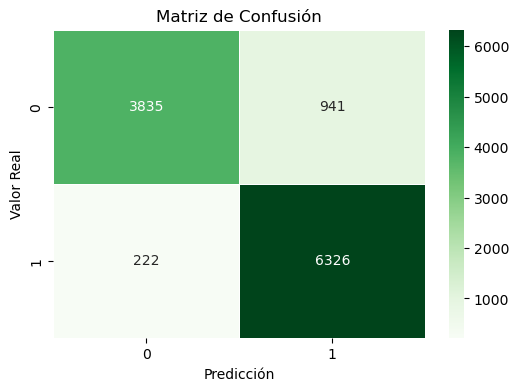

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

y = data['Label']
## Se vuelve a realizar la vectorizacion pues al crear modelos con xtrain en cada paso anterior, se cambiaron los valores que se necesitan. 
#Se realiza con la combinacion de titulo y descripcion pues da un mejor resultado de 
data['completo'] = data['Titulo'].fillna('') + ' ' + data['Descripcion'].fillna('')
X_train, X_test, y_train, y_test = train_test_split( data['completo'],y,test_size=0.2, random_state=42,stratify=y )
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stopwords_spanish, lowercase=True)

X_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_tfidf, y_train)

y_pred = modelo.predict(X_test_tfidf)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print('Exactitud: %.2f' % accuracy_score(y_test, y_pred))
print("Recall: {}".format(recall_score(y_test,y_pred)))
print("Precisión: {}".format(precision_score(y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred)))

print("\nReporte de Clasificación:")
print(classification_rep)


# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', linewidths=0.5, linecolor='white')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


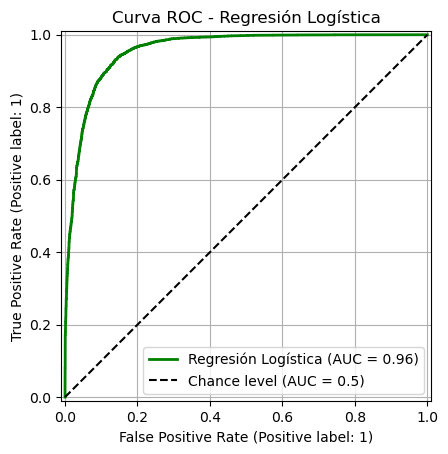

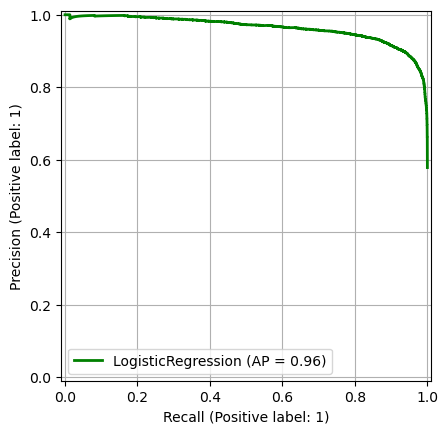

In [69]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
RocCurveDisplay.from_estimator(modelo, X_test_tfidf, y_test,plot_chance_level=True,name="Regresión Logística",color="green",linewidth=2 )


plt.title("Curva ROC - Regresión Logística")
plt.grid(True)
plt.show()

PrecisionRecallDisplay.from_estimator(modelo, X_test_tfidf, y_test, color='green',  linewidth=2)
plt.grid(True)
plt.show()

### Analisis de resultados 

- Exactitud: 90% 
- Recall: 96.6% (1) y 80% (0)
- Precision: 87% (1) y 95% (0)
- Puntuacion F1: 92% (1) y 87%(0)

**Exactitud:** Este valor nos indica que el 90% de las noticias fueron clasificadas correctamente. 

**Recall:** Este valor nos indica que el 96.6% de las noticias verdaderas fueron correctamente indentificadas mientras que el 80% de las noticias falsas fueron identificadas correctamente. Un recall alto en noticias falsas minimiza el riesgo de que noticias engañosas pasen desapercibidas.

**Precision:** Este valor nos indica que el 87% de las noticias que fueron clasificadas como verdaderas son verdaderas y el 95% de las falsas fueron identificadas como falsas. Esto implica que el modelo es más confiable al predecir noticias falsas, lo que reduce los falsos positivos y mejora la calidad de las predicciones.

**F1:** Para este valor, tenemos un f1 score de 87% para noticias falsas y 92% de noticias verdaderas. Eso quiere decir que tiene un mejor desempeño en la deteccion de noticias verdaderas que las falsas. 

### Interpretación de la Matriz de Confusión

- **Verdaderos Negativos (TN):** (valor real 0, prediccion 0)
     3835 noticias falsas fueron correctamente clasificadas como falsas, el modelo es efectivo identificando noticias falsas. 

- **Falsos Positivos (FP):** (valor real 0, prediccion 1)
     941 noticias falsas fueron clasificadas como verdaderas cuando eran falsas. El modelo se equivoco con una noticia falsa lo cual puede causar propagacion de noticias falsas. 

- **Falsos Negativos (FN):** (valor real 1, preduccion 0)    
     222 noticias verdaderas fueron clasificadas como falsas cuando eran verdaderas. Aunque la prioridad es detectar las noticias falsas, el modelo hizo un error categorizando una noticia verdadera. Los problemas de esto no tienen tantas consecuencias negativas. 

- **Verdaderos Positivos (TP):** (valor real 1, prediccion 1)
     6326 noticias verdaderas fueron correctamente clasificadas como verdaderas. Esto demuestra que el modelo tiene un buen rendimiento al identificar correctamente noticias reales.

### Analisis curva ROC 

La curva ROC nos muestra el rendimiento del modelo de regresión logística en la clasificación de las clases. El área bajo la curva (AUC) es de 0.96, lo que indica un muy buen desempeño. Esto significa que el modelo tiene una alta capacidad para distinguir entre las clases positivas y negativas. Mientras más cerca esté la curva del punto superior izquierdo, mejor es el modelo. 

### Analisis curva precision-recall

La gráfica de Precisión-Recall muestra que el modelo logra mantener una alta precisión a lo largo de casi todo el rango de recall. Esto significa que, a medida que el modelo identifica una mayor proporción de instancias positivas (alto recall), sigue siendo capaz de mantener un bajo número de falsos positivos (alta precisión). Con un área promedio bajo la curva de 0.96, el modelo demuestra un buen desempeño.

# Algoritmo Escogido: Arboles de decision

In [62]:
X_test_tfidf = tfidf.transform(X_test)
train_pred = arbol.predict(X_tfidf)
test_pred= arbol.predict(X_test_tfidf)

# Crear una nueva columna en el DataFrame original y asignar valores
data['prediction'] = None  # Inicializar la columna

# Asignar predicciones a sus respectivas filas
data.loc[X_train.index, 'prediction'] = train_pred
data.loc[X_test.index, 'prediction'] = test_pred

# Guardar el DataFrame en un archivo CSV
data.to_csv('predicciones.csv', index=False)

print("Archivo 'predicciones.csv' guardado exitosamente.")


Archivo 'predicciones.csv' guardado exitosamente.


# PIPELINE

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import re
import nltk
import joblib
from nltk.tokenize import WordPunctTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from scipy.sparse import hstack
from joblib import dump, load

# Descargar stopwords si es necesario
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('spanish'))  # Convertir a lista para evitar errores

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns  # Columnas a procesar
        self.tokenizer = WordPunctTokenizer()
        self.stemmer = PorterStemmer()
    
    def fit(self, X, y=None):
        return self  # No necesita aprendizaje, solo transformación
    
    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].astype(str).apply(self.preprocessor)
        X['Texto'] = X['Titulo'] + ' ' + X['Descripcion']  # Concatenar texto
        return X
    
    def preprocessor(self, text):
        text = re.sub(r'<[^>]*>', '', text)  # Eliminar etiquetas HTML
        text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
        text = text.lower().strip()  # Convertir a minúsculas y limpiar espacios
        tokens = self.tokenizer.tokenize(text)  # Tokenizar
        filtered_tokens = [self.stemmer.stem(token) for token in tokens if token not in stop_words]  # Stopwords y stemming
        return ' '.join(filtered_tokens)  # Reconstruir texto

class TextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, column, method='bow', ngram_range=(2,3), max_features=100000):
        self.column = column
        self.method = method
        if method == 'bow':
            self.vectorizer = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True, token_pattern=None, ngram_range=ngram_range, max_features=max_features)
        elif method == 'tfidf':
            self.vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True, token_pattern=None, ngram_range=ngram_range, max_features=max_features)
    
    def fit(self, X, y=None):
        self.vectorizer.fit(X[self.column])
        return self
    
    def transform(self, X):
        return self.vectorizer.transform(X[self.column])

# Solo cargar datos al entrenar
columns_to_process = ['Titulo', 'Descripcion']
text_preprocessor = TextPreprocessor(columns=columns_to_process)
text_vectorizer_tfidf = TextVectorizer(column='Texto', method='tfidf')

datax = pd.read_csv('./data/fake_news_spanish.csv', sep=';', encoding='utf-8')
data = datax.copy()
data = data.drop_duplicates()
data = text_preprocessor.transform(data)

# División de datos
X_train, X_test, Y_train, Y_test = train_test_split(data['Texto'], data['Label'], test_size=0.3, stratify=data['Label'], random_state=1)

# Vectorización con TF-IDF
X_tfidf_train = text_vectorizer_tfidf.fit_transform(X_train.to_frame())
X_tfidf_test = text_vectorizer_tfidf.transform(X_test.to_frame())

# Crear y entrenar el modelo de árbol de decisión
arbol = DecisionTreeClassifier(random_state=1)
arbol.fit(X_tfidf_train, Y_train)

# Guardar el pipeline una sola vez
pipeline = {
    'preprocessor': text_preprocessor,
    'vectorizer': text_vectorizer_tfidf,
    'model': arbol
}
joblib.dump(pipeline, './Entrega2/assets/pipeline_model.joblib')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolasarango/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nicolasarango/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/nicolasarango/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


ModuleNotFoundError: No module named 'DataPreprocessing'

In [49]:
# Cargar el pipeline una sola vez en memoria
pipeline = joblib.load('pipeline_model.joblib')

def predict_new(title, description):
    new_data = pd.DataFrame({'Titulo': [title], 'Descripcion': [description]})
    new_data = pipeline['preprocessor'].transform(new_data)
    
    if 'Texto' not in new_data:
        print("Error: La columna 'Texto' no se generó correctamente.")
        return None
    
    new_vectorized = pipeline['vectorizer'].transform(new_data)
    probabilities = pipeline['model'].predict_proba(new_vectorized)
    prediction = pipeline['model'].predict(new_vectorized)[0]
    confidence = round(max(probabilities[0]) * 100, 2)
    resultado = "verdadera" if prediction == 1 else "falsa"
    return f"La noticia es {resultado} con un {confidence}% de certeza."

# Ejemplo de predicción
nuevo_titulo = "Noticias falsas en redes sociales"
nueva_descripcion = "Analizamos el impacto de las noticias falsas en plataformas digitales."
print(predict_new(nuevo_titulo, nueva_descripcion))

La noticia es verdadera con un 100.0% de certeza.
